### Task 1: Student Score Prediction (Linear Regression) 

**Requirements:** pandas, numpy, matplotlib, seaborn, scikit-learn  

**Objective:** Predict students' exam scores based on study hours.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# load dataset
df = pd.read_csv('student_data.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
# data cleaning
df.isnull().sum() # check missing values

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [ ]:
df = df.dropna() # remove missing rows

In [6]:
print(df.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


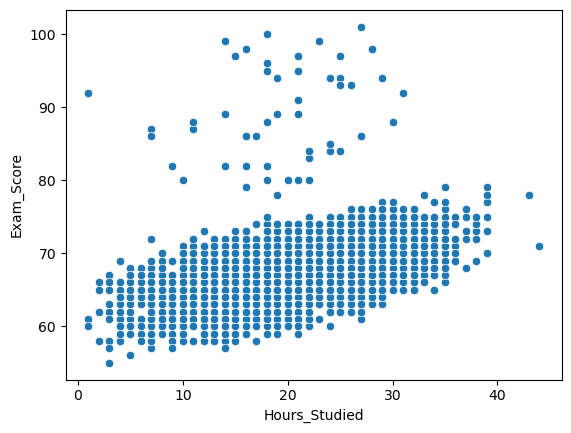

In [ ]:
# basic visualization
sns.scatterplot(x="Hours_Studied", y="Exam_Score", data=df)
plt.show()

In [ ]:
df.corr(numeric_only=True)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.004997,0.013119,0.022492,-0.009654,0.003183,0.445104
Attendance,-0.004997,1.000000,-0.019602,-0.018083,0.012070,-0.022976,0.580259
Sleep_Hours,0.013119,-0.019602,1.000000,-0.023238,-0.011466,-0.002898,-0.017171
Previous_Scores,0.022492,-0.018083,-0.023238,1.000000,-0.013158,-0.006694,0.174283
Tutoring_Sessions,-0.009654,0.012070,-0.011466,-0.013158,1.000000,0.016325,0.156829
Physical_Activity,0.003183,-0.022976,-0.002898,-0.006694,0.016325,1.000000,0.025148
Exam_Score,0.445104,0.580259,-0.017171,0.174283,0.156829,0.025148,1.000000


In [ ]:
# train-test split
X = df[["Hours_Studied"]]   # feature (independent variable)
y = df["Exam_Score"]        # target (dependent variable)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# make predictions
y_pred = model.predict(X_test)

In [ ]:
# evaluate model
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.20513060832466712
MSE: 12.351733799445533


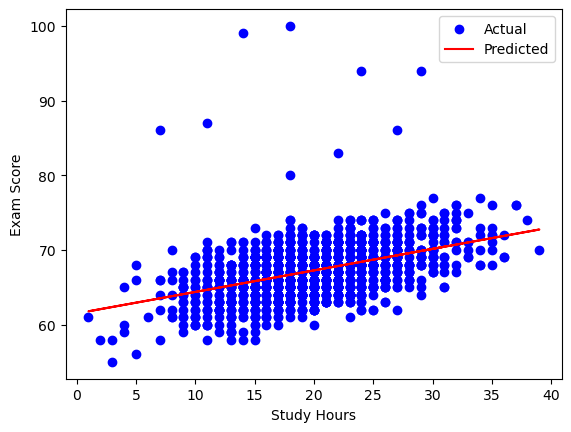

In [ ]:
# visualize predictions
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.legend()
plt.show()

In [18]:
# bonus task
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.2050784559067499
